<a href="https://colab.research.google.com/github/eduardoluisvieira/mackenzie/blob/main/EDA_SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eduardo Luís Vieira
Trilha 4 - Exercício de Fixação 
# **Análise Exploratória de Dados - SuperStore**

Esse dataset traz informações de vendas de produtos por região, categoria, segmento da denominada Superstore Giant

---



In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from mlxtend.preprocessing import minmax_scaling

In [3]:
superstore = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/Datasets/main/Sample%20-%20Superstore.csv',sep=',',encoding='latin1')

In [4]:
# Overview do dataset
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Verificação dos tipos de dados de cada coluna. Já identificado que as colunas de data estão como tipo objeto.
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# Verificando se há valores nulos nas colunas.
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
superstore.shape

(9994, 21)

In [9]:
# Transformando a data de objeto para data
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])

In [10]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
# Verifica se os pedidos de compra são únicos. Veja que temos 9994 pedidos registrados porém somente 5009 são únicos. Isso pressupõe que os itens 
# de produtos possuem o mesmo Order ID e estão registrados nessa mesma coluna.
len(superstore['Order ID'].unique())

5009

# **Respondendo as questões sobre a SuperStore**

---



# **1- Quantos e quais produtos foram comercializados?**

In [12]:
total_produtos = len(superstore['Product ID'].unique())
print('Os tipos de produtos comercializados foram {}'.format(total_produtos))

Os tipos de produtos comercializados foram 1862


In [13]:
produtos = list(superstore['Product Name'].unique())
for i in range(0,len(produtos)):
  print("{}: {}".format(i,produtos[i]))

0: Bush Somerset Collection Bookcase
1: Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back
2: Self-Adhesive Address Labels for Typewriters by Universal
3: Bretford CR4500 Series Slim Rectangular Table
4: Eldon Fold 'N Roll Cart System
5: Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood
6: Newell 322
7: Mitel 5320 IP Phone VoIP phone
8: DXL Angle-View Binders with Locking Rings by Samsill
9: Belkin F5C206VTEL 6 Outlet Surge
10: Chromcraft Rectangular Conference Tables
11: Konftel 250 Conference phone - Charcoal black
12: Xerox 1967
13: Fellowes PB200 Plastic Comb Binding Machine
14: Holmes Replacement Filter for HEPA Air Cleaner, Very Large Room, HEPA Filter
15: Storex DuraTech Recycled Plastic Frosted Binders
16: Stur-D-Stor Shelving, Vertical 5-Shelf: 72"H x 36"W x 18 1/2"D
17: Fellowes Super Stor/Drawer
18: Newell 341
19: Cisco SPA 501G IP Phone
20: Wilson Jones Hanging View Binder, White, 1"
21: Newell 318
22: Acco Six-Outlet Power Strip, 4' Cord Length
23: 

# **2 - Qual o tempo médio de entrega dos produtos?**

In [14]:
tempo_entrega = superstore['Ship Date'] - superstore['Order Date']
print('O tempo médio de entrega é de:{}'.format((tempo_entrega).mean()))

O tempo médio de entrega é de:3 days 22:59:46.311787072


# **3 - Qual o prazo máximo de entrega?**

In [15]:
print('O prazo máximo de entrega é de:{}'.format((tempo_entrega).max()))

O prazo máximo de entrega é de:7 days 00:00:00


# **4 - Quais os 10 produtos mais comercializados e suas respectivas vendas e lucros?**

In [18]:
superstore['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

In [19]:
products_freq = superstore.groupby('Product Name').count()
products_freq.reset_index(inplace=True)
products_freq.head(10)

,Product Name,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,"""While you Were Out"" Message Book, One Form pe...",3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,"#10 Gummed Flap White Envelopes, 100/Box",4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,#10 Self-Seal White Envelopes,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
5,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
6,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,#6 3/4 Gummed Flap White Envelopes,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9,1/4 Fold Party Design Invitations & White Enve...,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [20]:
products_most_freq = products_freq.nlargest(10,'Sales')
products_most_freq.reset_index(inplace=True)
products_most_freq

,index,Product Name,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,...,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1493,Staple envelope,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,537,Easy-staple paper,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
2,1499,Staples,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
3,259,Avery Non-Stick Binders,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
4,1500,Staples in misc. colors,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
5,942,KI Adjustable-Height Table,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
6,1496,Staple remover,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
7,1511,Storex Dura Pro Binders,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
8,1497,Staple-based wall hangings,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
9,993,Logitech 910-002974 M325 Wireless Mouse for We...,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [21]:
print ("As 10 categorias mais comercializadas são:\n")
for i in range(0,10):
  print("{} {}: {}".format(i+1,
                           products_most_freq['Product Name'][i],
                           products_most_freq['Sales'][i]))

As 10 categorias mais comercializadas são:

1 Staple envelope: 48
2 Easy-staple paper: 46
3 Staples: 46
4 Avery Non-Stick Binders: 20
5 Staples in misc. colors: 19
6 KI Adjustable-Height Table: 18
7 Staple remover: 18
8 Storex Dura Pro Binders: 17
9 Staple-based wall hangings: 16
10 Logitech 910-002974 M325 Wireless Mouse for Web Scrolling: 15


Text(0.5, 1.0, 'Categoria de Produtos mais vendidos')

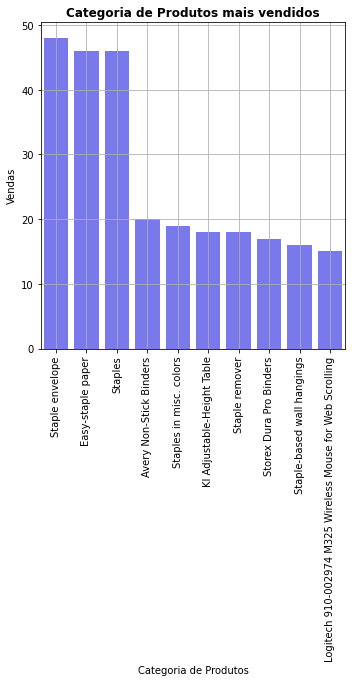

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=products_most_freq['Product Name'],y=products_most_freq['Sales'], color='b',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Categoria de Produtos')
plt.ylabel('Vendas')
plt.grid()
plt.title('Categoria de Produtos mais vendidos',fontsize=12,weight='bold')




# **5 - Qual o valor médio das vendas?**

In [23]:
Sales = superstore['Sales']
print(f'O valor médio de vendas é de: USD {Sales.mean():.2f}')

O valor médio de vendas é de: USD 229.86


# **6 - Quais as cidades mais compraram produtos?**

In [24]:
superstore['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [31]:
city_freq = superstore.groupby('City').count()
city_freq.reset_index(inplace=True)
city_most_freq = city_freq.nlargest(10,'Sales')
city_most_freq.reset_index(inplace=True)
city_most_freq
print ("As 10 cidades mais que mais compraram foram:\n")
for i in range(0,10):
  print("{} {}: {}".format(i+1,
                           city_most_freq['City'][i],
                           city_most_freq['Sales'][i]))

As 10 cidades mais que mais compraram foram:

1 New York City: 915
2 Los Angeles: 747
3 Philadelphia: 537
4 San Francisco: 510
5 Seattle: 428
6 Houston: 377
7 Chicago: 314
8 Columbus: 222
9 San Diego: 170
10 Springfield: 163


No handles with labels found to put in legend.


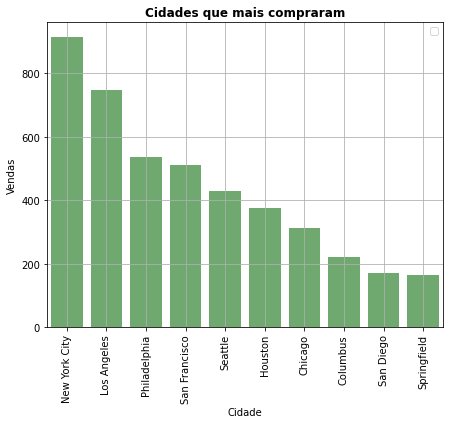

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=city_most_freq['City'],y=city_most_freq['Sales'], color='g',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Cidade')
plt.ylabel('Vendas')
plt.grid()
plt.title('Cidades que mais compraram',fontsize=12,weight='bold')
plt.legend()

plt.tight_layout()
plt.show()

# **5 - Quais os segmentos atendidos?**

In [27]:
superstore['Segment'].value_counts()



Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

# **6 - Qual o volume de vendas e lucro por segmento?**

Text(0.5, 1.0, 'Lucro por Segmento')

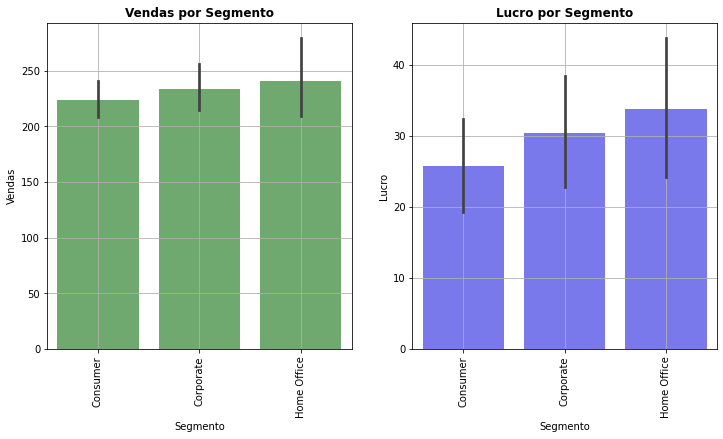

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=superstore['Segment'],y=superstore['Sales'], color='g',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Segmento')
plt.ylabel('Vendas')
plt.grid()
plt.title('Vendas por Segmento',fontsize=12,weight='bold')

plt.subplot(1,2,2)

sns.barplot(x=superstore['Segment'],y=superstore['Profit'], color='b',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Segmento')
plt.ylabel('Lucro')
plt.grid()
plt.title('Lucro por Segmento',fontsize=12,weight='bold')